### Load the data

In [9]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Exploring the data

In [4]:
print("Training Images:", len(X_train))
print("Testing data: ", len(X_test))
print("Shape:", X_train[0].shape)

Training Images: 60000
Testing data:  10000
Shape: (28, 28)


    So we’ve got 60,000 training images and 10,000 testing images, each of which is a NumPy array of shape 
    -Let’s have a look at some random images from our dataset.

In [6]:
import random
import matplotlib.pyplot as plt

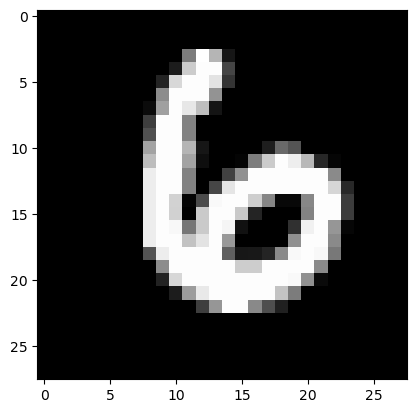

In [9]:
random_image = random.choice(X_train)
plt.imshow(random_image, cmap="gray")

### Preprocessing the data

    Since we’re going to use a Convolutional Neural Network, we need to make some adjustments to our data.

    A CNN requires the images to be in the shape (width, height, color_channels) but our (28, 28) images only have width and height. We need to modify their shape to contain the color_channel as well, so that their new shape becomes (28, 28, 1) (grayscale images have only one channel)

In [10]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
X_train.shape

(60000, 28, 28, 1)

    The value of each pixel in our image contains a value between 0 and 255. We will normalize them to the range between 0 and 1 so that our model can learn faster.

In [11]:
X_train = X_train / 255
X_test = X_test / 255

    Now, as the last step of preprocessing, we will convert the type of our data to float32 instead of the default float64. This will reduce the model training time and increase its performance.

In [12]:
import numpy as np
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

### # What .shape[0] means

In [16]:
import numpy as np
Y = np.arange(12).reshape(3,4)
Y

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [17]:
Y.shape

(3, 4)

In [18]:
Y.shape[0]

3

### Building and Training the Model

    Our model will have two sets of two convolutional layers followed by a max pooling layer, then a flatten layer followed by a dense, full-connected output layer.

In [23]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Conv2D(filters = 10,
                 kernel_size = 3,
                 activation = "relu",
                 input_shape=(28, 28, 1)),

layers.Conv2D(10, 3, activation="relu"),
layers.MaxPool2D(),
    
layers.Conv2D(10, 3, activation="relu"),
layers.Conv2D(10, 3, activation="relu"),
layers.MaxPool2D(),
    
layers.Flatten(),
layers.Dense(10, activation="softmax")
])

    Now we’ll compile our model using the Sparse Categorical Crossentropy as our loss function and Adam as the optimizer.

In [27]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

#### Fit/Train

    Finally, let’s train our model on the training data over 3 epochs.

In [28]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 43s 21ms/step - loss: 0.2768 - accuracy: 0.9134
Epoch 2/3
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0902 - accuracy: 0.9718
Epoch 3/3
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0653 - accuracy: 0.9791


#### Evaluate

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0544 - accuracy: 0.9824


[0.05441936105489731, 0.9824000000953674]

### Converting our model to TFLite format

    For small web apps, TFLite works the best as it is only ~1MB as compared to the standard Tensorflow installation of ~450MB.
    To install, Run pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

    Now, let’s convert our Tensorflow model to TFLite model using tf.lite API:

In [32]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:  
	f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp3c3foi5d\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp3c3foi5d\assets


    Now we have the .tflite file for our model which we’ll be using our web app. Let’s check if it’s working and also see how the “inference” process works in TFLite.

### Making predictions with our TFLite Model

    When it comes to TFLite, running inferences is a bit different than the standard .predict()method.
    First thing you need to do is to create an instance of TFLite interpreter and allocate the input and output tensors to it.

In [35]:
#import tflite_runtime.interpreter as tflite
#interpreter = tflite.Interpreter(model_path="model.tflite")
#interpreter.allocate_tensors()

    gives import error because tensorflow is already imported
    
    So we move onto normal TF prediction

    Save tf model incase TFLite model doesn't work

### Save Model

In [36]:
model.save("digitRecognition.model")

INFO:tensorflow:Assets written to: digitRecognition.model\assets


INFO:tensorflow:Assets written to: digitRecognition.model\assets


### Predict
    Test with any number in our data

NameError: name 'model' is not defined

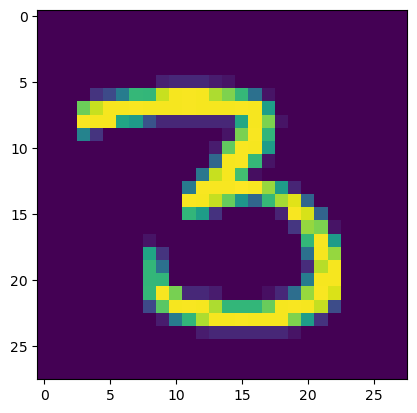

In [14]:
plt.imshow(X_test[2502].reshape(28,28))
input = X_test[2502].reshape(-1, 28, 28, 1)
prediction = model.predict(input)
print(f"The number is probably: {np.argmax(prediction)}")

### Predict using saved Model
    N/B You will have to load the data and refine it agan i.e X_test etc

In [2]:
import tensorflow as tf

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [7]:
saved_model = tf.keras.models.load_model('digitRecognition.model')

1/1 [==============================] - 0s 183ms/step
The number is probably: 2


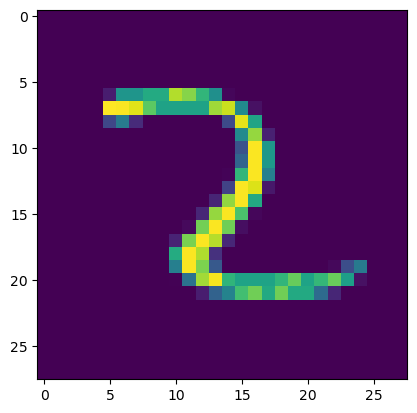

In [13]:
plt.imshow(X_test[2500].reshape(28,28))
input = X_test[2500].reshape(-1, 28, 28, 1)
prediction = saved_model.predict(input)
print(f"The number is probably: {np.argmax(prediction)}")